# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цель практической работы

Научиться работать с аномалиями в данных, строить визуализации, а также выявлять зависимости между переменными с помощью библиотеки Matplotlib.

## Что входит в практическую работу

1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графики для количественных переменных.
4. Построить графики для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [39]:
import pandas as pd
df = pd.read_csv('data/vehicles_dataset_upd.csv')

print(df['price'].describe())

count    9.868000e+03
mean     2.060201e+04
std      1.254372e+05
min      5.000000e+02
25%      7.800000e+03
50%      1.559000e+04
75%      2.799000e+04
max      1.234568e+07
Name: price, dtype: float64


### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [5]:
import pandas as pd
df = pd.read_csv('data/vehicles_dataset_upd.csv')

print(df.head())

           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7316474668  https://newyork.craigslist.org/lgi/cto/d/baldw...   

          region                           region_url  price  year  \
0    chattanooga   https://chattanooga.craigslist.org  54990  2020   
1   north jersey     https://newjersey.craigslist.org  16942  2016   
2   reno / tahoe          https://reno.craigslist.org  35590  2017   
3   fayetteville  https://fayetteville.craigslist.org  14500  2013   
4  new york city       https://newyork.craigslist.org  21800  2021   

  manufacturer                   model    fuel  odometer title_status  \
0          ram  2500 crew cab big horn  diesel     27442        clean   
1         ford    explor

2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

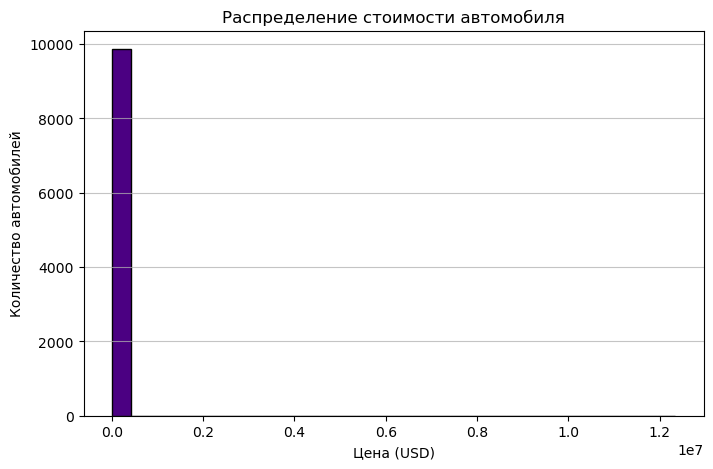

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

plt.hist(df['price'], bins=30, color='indigo', edgecolor='black')
plt.title('Распределение стоимости автомобиля')
plt.xlabel('Цена (USD)')
plt.ylabel('Количество автомобилей')

plt.grid(axis='y', alpha=0.75)
plt.show()

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

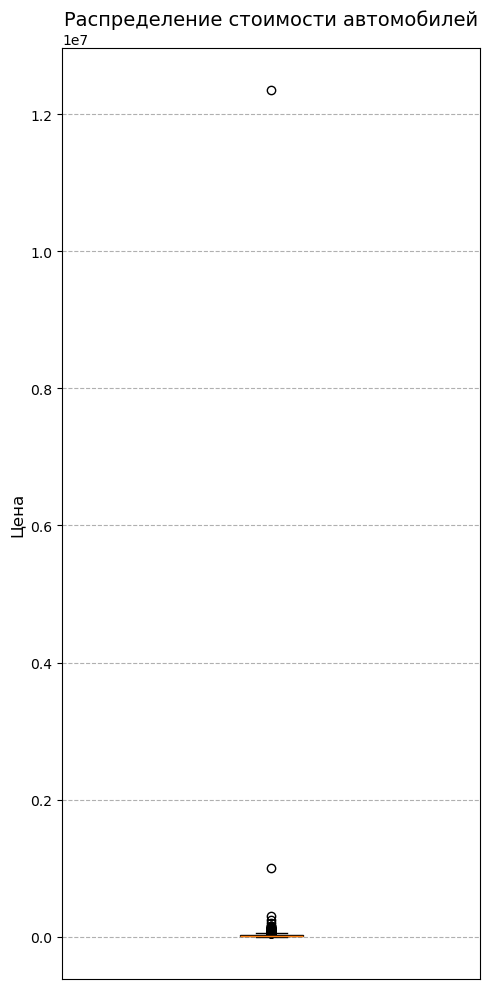

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5, 10))


plt.boxplot(df['price'], vert=True, patch_artist=True, showfliers=True)


plt.title('Распределение стоимости автомобилей', fontsize=14)
plt.ylabel('Цена', fontsize=12)
plt.grid(axis='y', linestyle='--')

plt.xticks([])

plt.tight_layout()
plt.show()

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [11]:
formatted_stats = df['price'].describe().apply(lambda x: f"{x:0.3f}")

print(formatted_stats)

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object


5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [13]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


min_price = df['price'].min()
max_price = df['price'].max()

print(f"Нижняя граница нормальных значений: {lower_bound:.2f}")
print(f"Верхняя граница нормальных значений: {upper_bound:.2f}")
print(f"Минимальная цена: {min_price:.2f}")
print(f"Максимальная цена: {max_price:.2f}")

Нижняя граница нормальных значений: -22485.00
Верхняя граница нормальных значений: 58275.00
Минимальная цена: 500.00
Максимальная цена: 12345678.00


6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [15]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Количество выбросов в стоимости автомобиля: {num_outliers}")

Количество выбросов в стоимости автомобиля: 207


7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [17]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers = outliers.sort_values(by='price')
print(outliers)

              id                                                url  \
934   7312212565  https://lasvegas.craigslist.org/cto/d/fresno-d...   
5977  7310551940  https://cincinnati.craigslist.org/ctd/d/camp-d...   
4783  7308933629  https://omaha.craigslist.org/cto/d/cortland-20...   
8050  7307146509  https://lubbock.craigslist.org/ctd/d/brownfiel...   
1253  7313450196  https://lasvegas.craigslist.org/ctd/d/salem-20...   
...          ...                                                ...   
6035  7315323093  https://daytona.craigslist.org/ctd/d/orlando-2...   
290   7310897583  https://tucson.craigslist.org/ctd/d/tucson-201...   
5585  7313998757  https://winchester.craigslist.org/ctd/d/manass...   
9663  7305237859  https://delaware.craigslist.org/cto/d/delaware...   
6239  7302112231  https://akroncanton.craigslist.org/ctd/d/canto...   

                      region                          region_url     price  \
934                las vegas     https://lasvegas.craigslist.org     

8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [19]:
print(outliers.tail(15))

              id                                                url  \
4073  7311841843  https://albuquerque.craigslist.org/ctd/d/albuq...   
1674  7303398175  https://pullman.craigslist.org/cto/d/pullman-6...   
9072  7308732637  https://evansville.craigslist.org/ctd/d/evansv...   
2963  7308463617  https://jacksonville.craigslist.org/cto/d/pont...   
5076  7314445453  https://boston.craigslist.org/gbs/ctd/d/methue...   
6471  7312384300  https://orlando.craigslist.org/ctd/d/orlando-2...   
8904  7314817013  https://sandiego.craigslist.org/csd/ctd/d/dall...   
4183  7316319465  https://portland.craigslist.org/clc/ctd/d/glad...   
8720  7313664504  https://austin.craigslist.org/cto/d/austin-sup...   
9042  7306718413  https://desmoines.craigslist.org/ctd/d/portlan...   
6035  7315323093  https://daytona.craigslist.org/ctd/d/orlando-2...   
290   7310897583  https://tucson.craigslist.org/ctd/d/tucson-201...   
5585  7313998757  https://winchester.craigslist.org/ctd/d/manass...   
9663  

9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

*Подсказка*: обратите внимание на оператор "~" (тильда) при фильтрации исходного датафрейма. Это операция not, которая часто применяется для инвертирования логических значений. Советуем заглянуть в [документацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), чтобы получить представление о его работе на примерах использования.

In [21]:
df_new = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]
print(df_new.head())

           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7316474668  https://newyork.craigslist.org/lgi/cto/d/baldw...   

          region                           region_url  price  year  \
0    chattanooga   https://chattanooga.craigslist.org  54990  2020   
1   north jersey     https://newjersey.craigslist.org  16942  2016   
2   reno / tahoe          https://reno.craigslist.org  35590  2017   
3   fayetteville  https://fayetteville.craigslist.org  14500  2013   
4  new york city       https://newyork.craigslist.org  21800  2021   

  manufacturer                   model    fuel  odometer title_status  \
0          ram  2500 crew cab big horn  diesel     27442        clean   
1         ford    explor

### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [23]:
df_year_price = df_new.groupby('year')['price'].mean().reset_index()

df_year_price = df_year_price.rename(columns={'year': 'production_year', 'price': 'mean_price'})

print(df_year_price)

    production_year    mean_price
0              1995  13219.472554
1              1996   9362.960000
2              1997   6441.250000
3              1998   6528.672727
4              1999   7446.641975
5              2000   7614.410256
6              2001   7852.090164
7              2002   7173.798658
8              2003   7767.962162
9              2004   7684.105769
10             2005   8019.770428
11             2006   8733.512195
12             2007   8578.738462
13             2008   9508.803063
14             2009   9703.035336
15             2010  11251.862857
16             2011  13014.494670
17             2012  14906.807432
18             2013  16138.114370
19             2014  18984.084375
20             2015  22383.042618
21             2016  23163.207521
22             2017  26328.875959
23             2018  28406.824289
24             2019  31434.111111
25             2020  33791.940104
26             2021  23868.250000
27             2022  15249.000000


2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

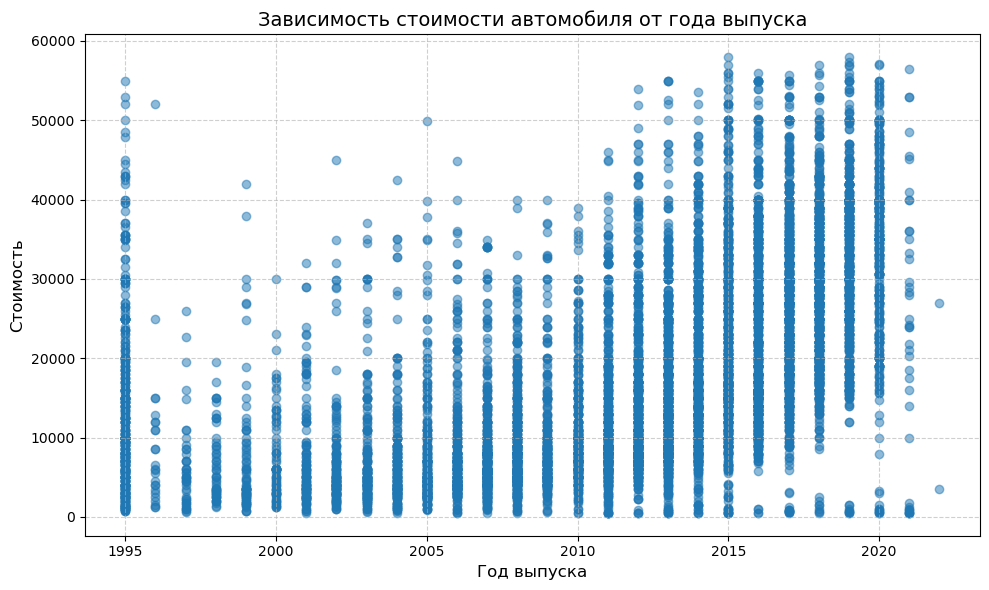

In [25]:
plt.figure(figsize=(10, 6))  
plt.scatter(df_new['year'], df_new['price'], alpha=0.5)


plt.title('Зависимость стоимости автомобиля от года выпуска', fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Стоимость', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() 
plt.show()

3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [27]:
df_year_count = df_new.groupby('year').size().reset_index(name='count')

print(df_year_count)

    year  count
0   1995    419
1   1996     25
2   1997     44
3   1998     55
4   1999     81
5   2000     78
6   2001    122
7   2002    149
8   2003    185
9   2004    208
10  2005    257
11  2006    287
12  2007    390
13  2008    457
14  2009    283
15  2010    350
16  2011    469
17  2012    592
18  2013    682
19  2014    640
20  2015    657
21  2016    718
22  2017    782
23  2018    774
24  2019    531
25  2020    384
26  2021     40
27  2022      2


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [29]:
df_filtered = df_new[df_new['year'] <= 2021]

print(df_filtered.head())


           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7316474668  https://newyork.craigslist.org/lgi/cto/d/baldw...   

          region                           region_url  price  year  \
0    chattanooga   https://chattanooga.craigslist.org  54990  2020   
1   north jersey     https://newjersey.craigslist.org  16942  2016   
2   reno / tahoe          https://reno.craigslist.org  35590  2017   
3   fayetteville  https://fayetteville.craigslist.org  14500  2013   
4  new york city       https://newyork.craigslist.org  21800  2021   

  manufacturer                   model    fuel  odometer title_status  \
0          ram  2500 crew cab big horn  diesel     27442        clean   
1         ford    explor

5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [31]:
df_year_price_filtered = df_filtered.groupby('year')['price'].mean().reset_index()

df_year_price_filtered = df_year_price_filtered.rename(columns={'year': 'production_year', 'price': 'mean_price'})

print(df_year_price_filtered)


    production_year    mean_price
0              1995  13219.472554
1              1996   9362.960000
2              1997   6441.250000
3              1998   6528.672727
4              1999   7446.641975
5              2000   7614.410256
6              2001   7852.090164
7              2002   7173.798658
8              2003   7767.962162
9              2004   7684.105769
10             2005   8019.770428
11             2006   8733.512195
12             2007   8578.738462
13             2008   9508.803063
14             2009   9703.035336
15             2010  11251.862857
16             2011  13014.494670
17             2012  14906.807432
18             2013  16138.114370
19             2014  18984.084375
20             2015  22383.042618
21             2016  23163.207521
22             2017  26328.875959
23             2018  28406.824289
24             2019  31434.111111
25             2020  33791.940104
26             2021  23868.250000


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

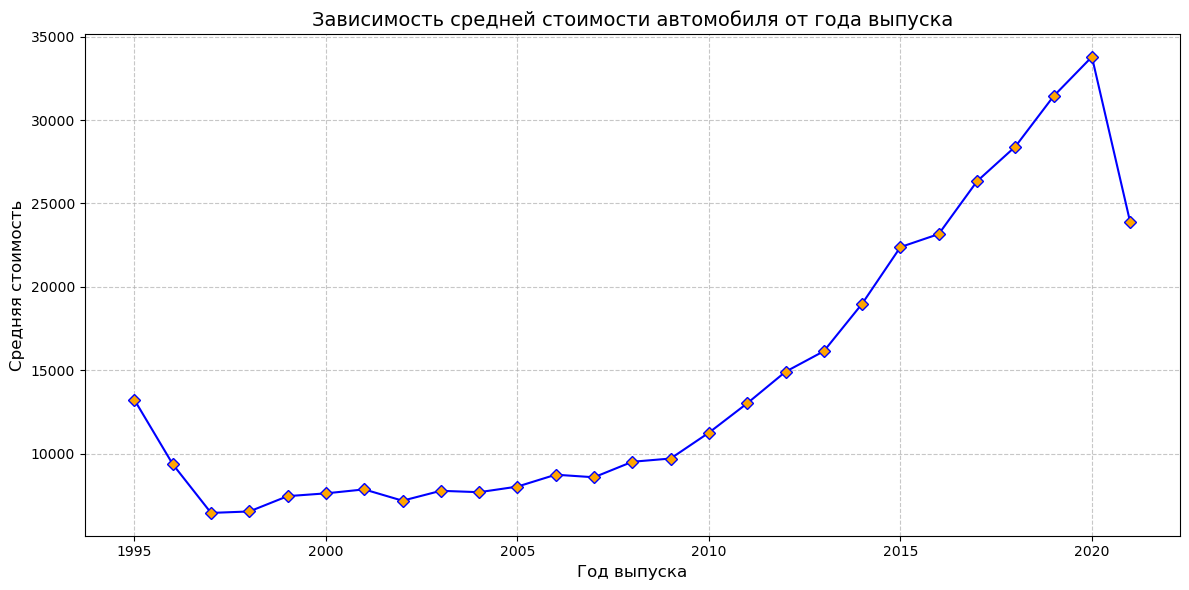

In [33]:
plt.figure(figsize=(12, 6)) 
plt.plot(df_year_price_filtered['production_year'], 
         df_year_price_filtered['mean_price'], 
         color='blue', 
         marker='D', 
         markerfacecolor='orange')


plt.title('Зависимость средней стоимости автомобиля от года выпуска', fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Средняя стоимость', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: __

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: __

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: __

In [37]:
correlation = df_filtered['price'].corr(df_filtered['year'])


print(f"Коэффициент корреляции Пирсона между стоимостью автомобиля и годом его производства: {correlation:.3f}")

print("\nОтветы на вопросы:")
print("""
1. Ответ: Да, можно. Коэффициент корреляции Пирсона показывает наличие линейной связи. Чем ближе коэффициент к 1 или -1, тем сильнее выражена линейная зависимость.

2. Ответ: Нет, нельзя сделать вывод о сильной корреляции. Значение коэффициента корреляции не является достаточно близким к 1 (или -1), чтобы считать корреляцию сильной. Обычно сильная корреляция считается при значении |r| >= 0.7.

3. Ответ: Существующая связь является прямой. Положительное значение коэффициента корреляции показывает, что с увеличением года выпуска стоимость автомобиля в среднем также увеличивается (в общих чертах), что и наблюдалось на графике.""")

Коэффициент корреляции Пирсона между стоимостью автомобиля и годом его производства: 0.550

Ответы на вопросы:

1. Ответ: Да, можно. Коэффициент корреляции Пирсона показывает наличие линейной связи. Чем ближе коэффициент к 1 или -1, тем сильнее выражена линейная зависимость.

2. Ответ: Нет, нельзя сделать вывод о сильной корреляции. Значение коэффициента корреляции не является достаточно близким к 1 (или -1), чтобы считать корреляцию сильной. Обычно сильная корреляция считается при значении |r| >= 0.7.

3. Ответ: Существующая связь является прямой. Положительное значение коэффициента корреляции показывает, что с увеличением года выпуска стоимость автомобиля в среднем также увеличивается (в общих чертах), что и наблюдалось на графике.


8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

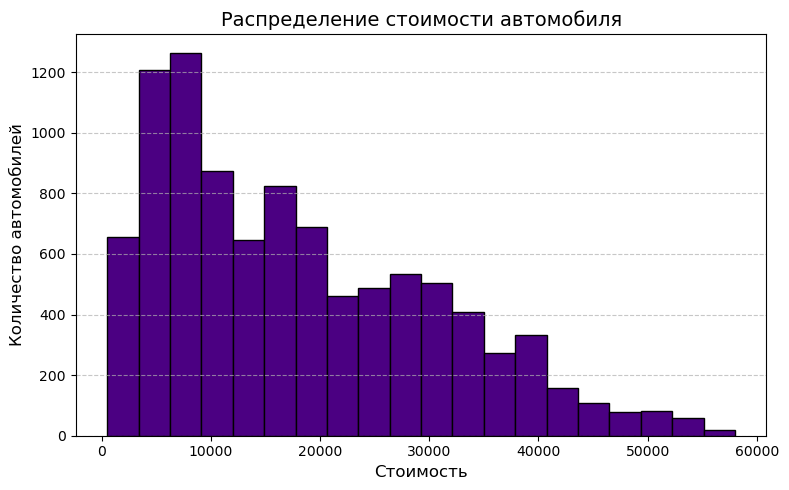

In [39]:
plt.figure(figsize=(8, 5))
plt.hist(df_filtered['price'], bins=20, color='indigo', edgecolor='black')

plt.title('Распределение стоимости автомобиля', fontsize=14)
plt.xlabel('Стоимость', fontsize=12)
plt.ylabel('Количество автомобилей', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [41]:
df_new.to_csv('data/vehicles_dataset_upd2.csv', index=False)

print("DataFrame df_new успешно сохранен в файл data/vehicles_dataset_upd2.csv")

DataFrame df_new успешно сохранен в файл data/vehicles_dataset_upd2.csv


### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


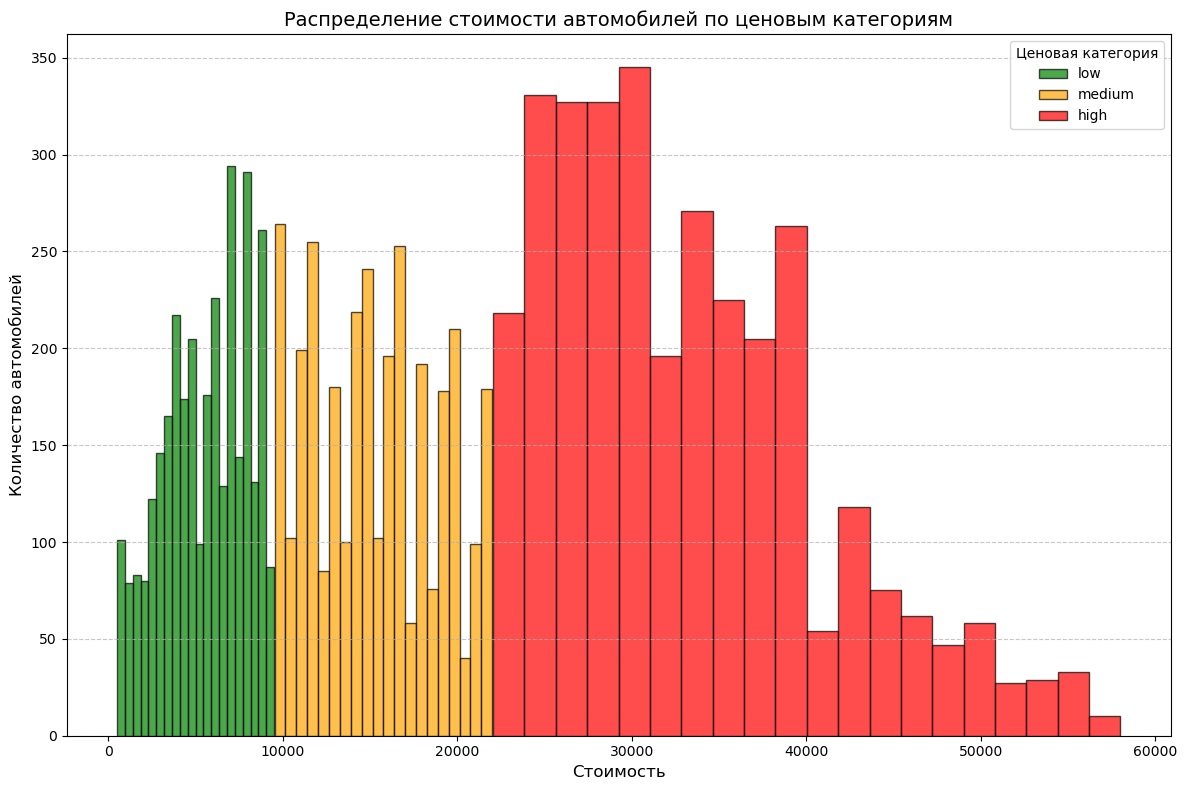


Почему полученный график так выглядит?
  Общее распределение цен сдвинуто вправо, что означает что, большая часть автомобилей имеет цену в диапазоне от 0 до 40000.



In [49]:
plt.figure(figsize=(12, 8))
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}


for category, color in colors.items():
    category_data = df_filtered[df_filtered['price_category'] == category]
    plt.hist(category_data['price'], 
             bins=20, 
             alpha=0.7, 
             color=color, 
             label=category, 
             edgecolor='black')  

plt.title('Распределение стоимости автомобилей по ценовым категориям', fontsize=14)
plt.xlabel('Стоимость', fontsize=12)
plt.ylabel('Количество автомобилей', fontsize=12)


plt.legend(title='Ценовая категория')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("""
Почему полученный график так выглядит?
  Общее распределение цен сдвинуто вправо, что означает что, большая часть автомобилей имеет цену в диапазоне от 0 до 40000.
""")

2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

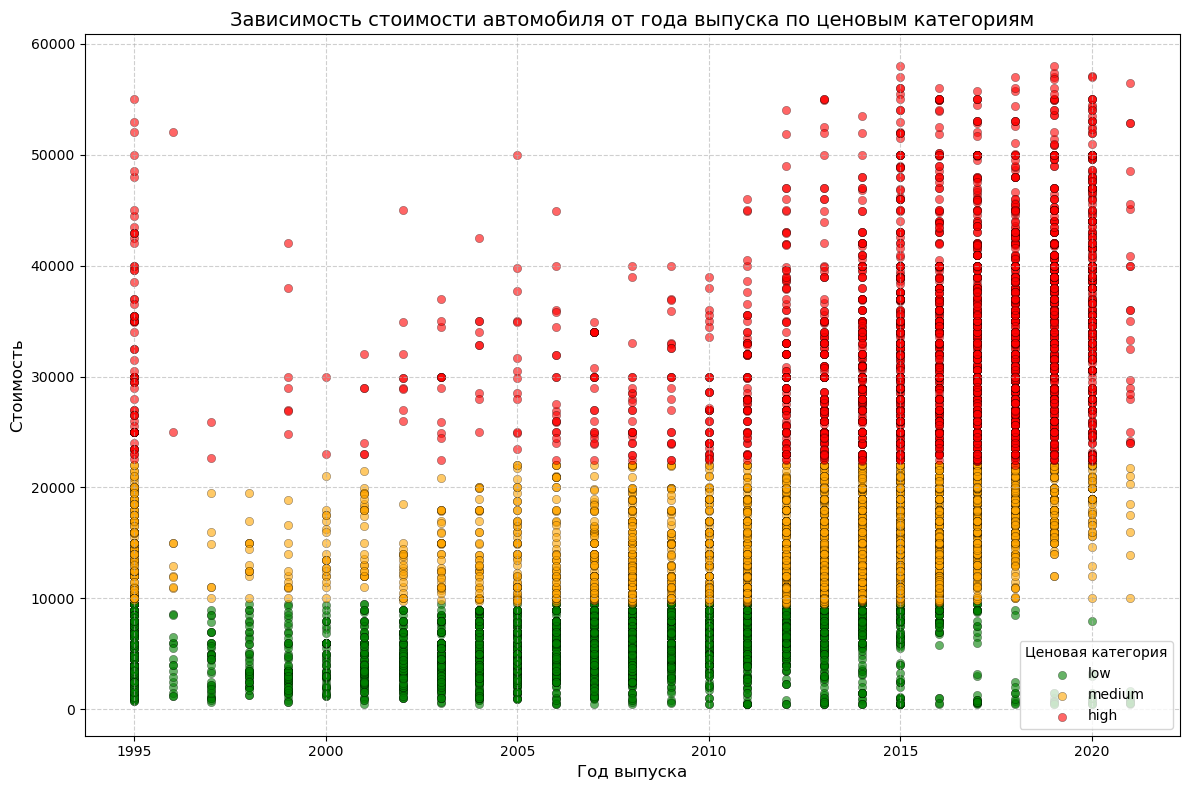

In [51]:
plt.figure(figsize=(12, 8))

colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

for category, color in colors.items():
    category_data = df_filtered[df_filtered['price_category'] == category]
    plt.scatter(category_data['year'], 
                category_data['price'], 
                alpha=0.6, 
                color=color, 
                label=category,
               edgecolors='black',
               linewidths=0.3) 

plt.title('Зависимость стоимости автомобиля от года выпуска по ценовым категориям', fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Стоимость', fontsize=12)

plt.legend(title='Ценовая категория', loc='lower right')

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [53]:
df_manufacturer_count = df_filtered.groupby('manufacturer').size().reset_index(name='count')

df_manufacturer_count = df_manufacturer_count.rename(columns={'manufacturer': 'manufacturer', 'count': 'number_of_cars'})

print(df_manufacturer_count)

       manufacturer  number_of_cars
0             acura             149
1        alfa-romeo              13
2              audi             193
3               bmw             307
4             buick             145
5          cadillac             179
6         chevrolet            1243
7          chrysler             159
8            datsun               2
9             dodge             321
10          ferrari               1
11             fiat              23
12             ford            1564
13              gmc             343
14  harley-davidson               4
15            honda             460
16          hyundai             221
17         infiniti             117
18           jaguar              43
19             jeep             483
20              kia             198
21            lexus             175
22          lincoln             109
23            mazda             142
24    mercedes-benz             221
25          mercury              32
26             mini         

2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

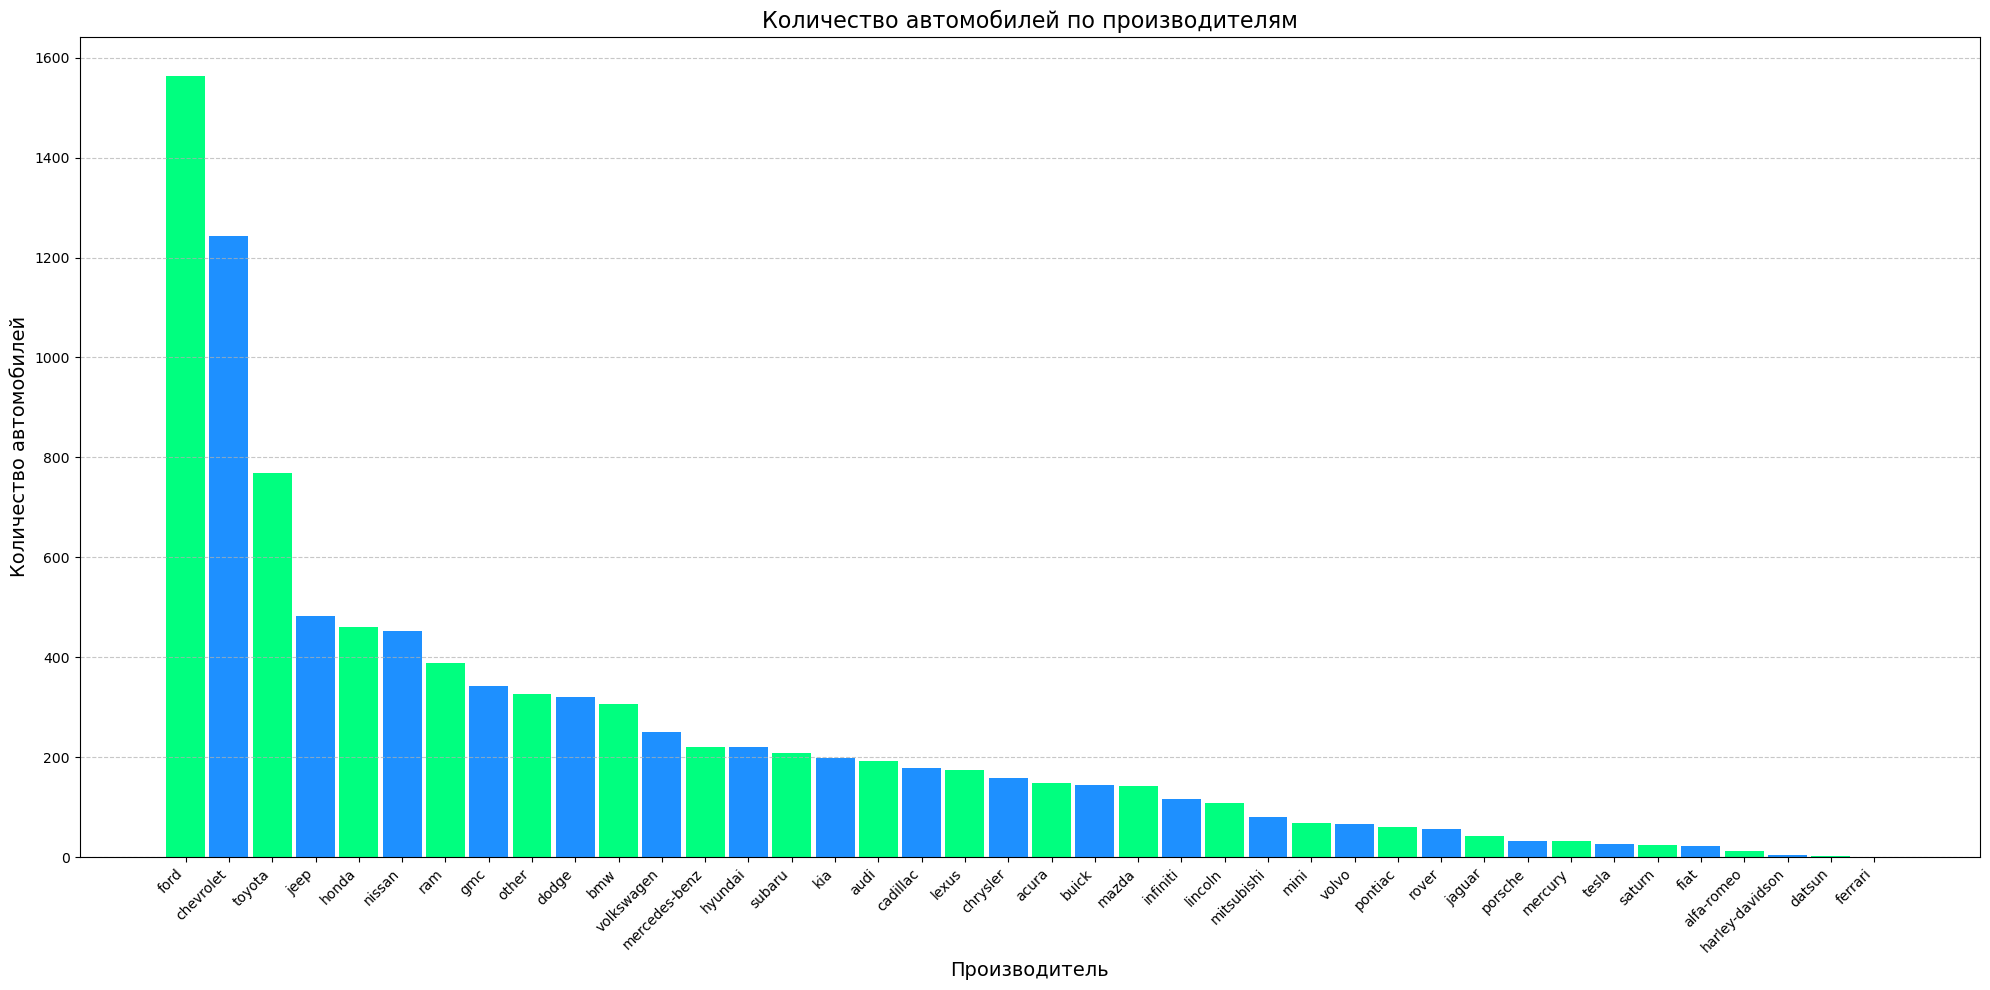

In [55]:
df_manufacturer_count = df_filtered.groupby('manufacturer').size().reset_index(name='number_of_cars')

df_manufacturer_count = df_manufacturer_count.sort_values(by='number_of_cars', ascending=False)

plt.figure(figsize=(20, 10))

colors = ['springgreen', 'dodgerblue']

bars = plt.bar(df_manufacturer_count['manufacturer'], 
                df_manufacturer_count['number_of_cars'], 
                width=0.9, 
                color=[colors[i % len(colors)] for i in range(len(df_manufacturer_count))]) 
plt.title('Количество автомобилей по производителям', fontsize=16)
plt.xlabel('Производитель', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [57]:
df_transmission_count = df_filtered.groupby('transmission').size().reset_index(name='number_of_cars')
df_transmission_count = df_transmission_count.rename(columns={'transmission': 'transmission_type'})
print(df_transmission_count)

  transmission_type  number_of_cars
0         automatic            7398
1            manual             612
2             other            1649


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


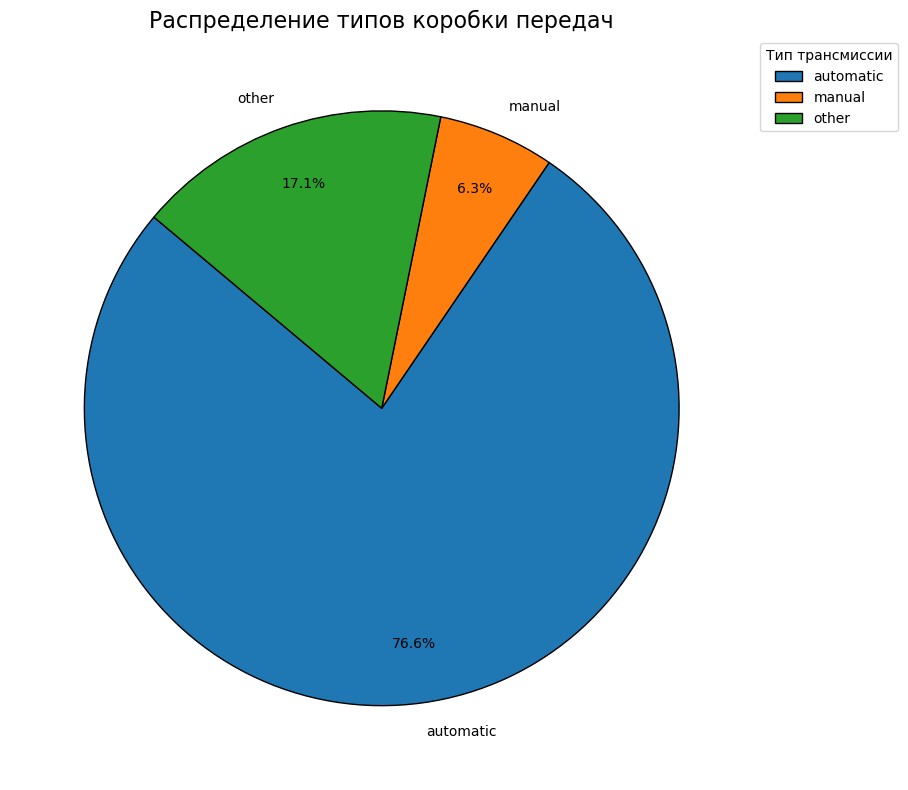

In [59]:
plt.figure(figsize=(12, 8))
plt.pie(df_transmission_count['number_of_cars'], 
        labels=df_transmission_count['transmission_type'], 
        autopct='%1.1f%%',  
        startangle=140,    
        wedgeprops={'edgecolor': 'black'}, 
        pctdistance=0.8)  
plt.title('Распределение типов коробки передач', fontsize=16)
plt.legend(title='Тип трансмиссии', 
           loc='upper left', 
           bbox_to_anchor=(1.0, 1.0))
plt.tight_layout(rect=[0,0,0.8,1])
plt.show()